### Cardiovascular Disease Prediction

In [ ]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression


In [47]:
#load in dataset
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [48]:
#dataset shape
df.shape

(1000, 14)

In [49]:
#view dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [50]:
#count the nulls
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [51]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


## Exploratory Data Analysis

In [52]:
# 1) FEATURE TYPES & MISSING VALUES
print("\nFEATURE TYPES:\n", df.dtypes, "\n")
print("MISSING VALUES:\n", df.isna().sum(), "\n")


FEATURE TYPES:
 patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object 

MISSING VALUES:
 patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64 



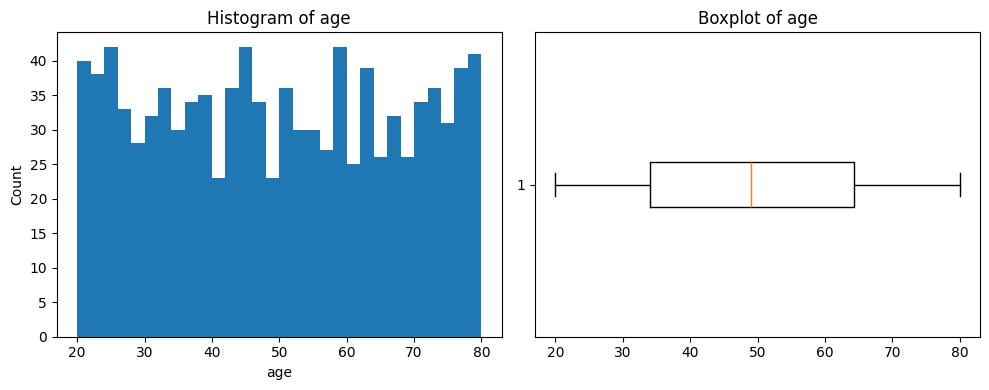

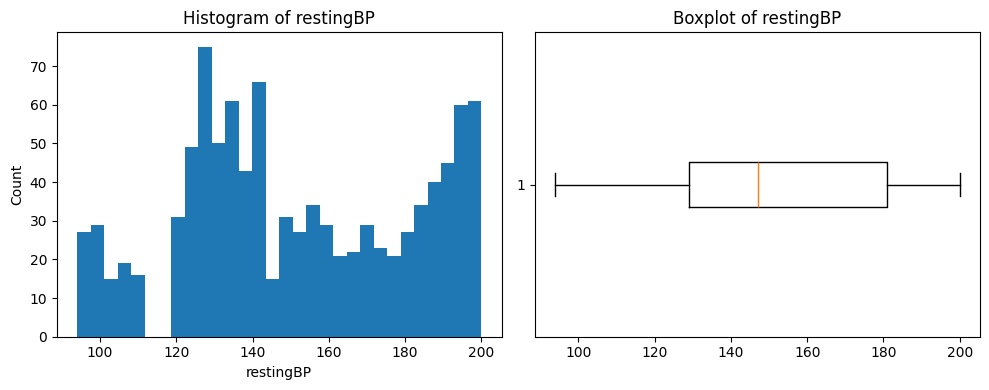

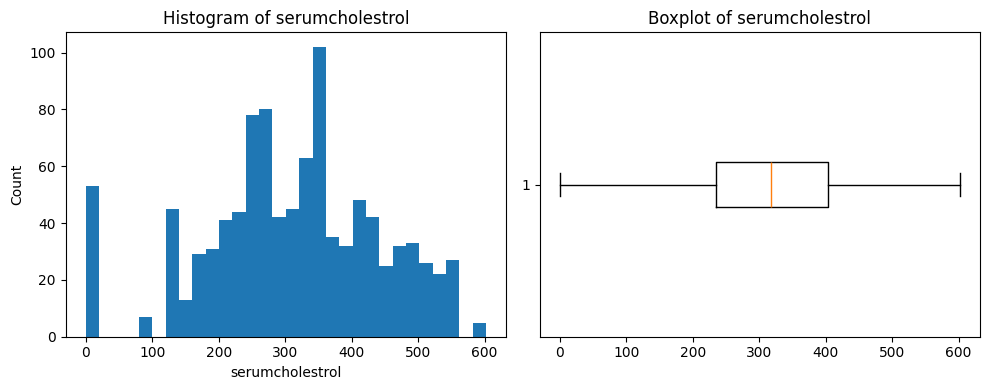

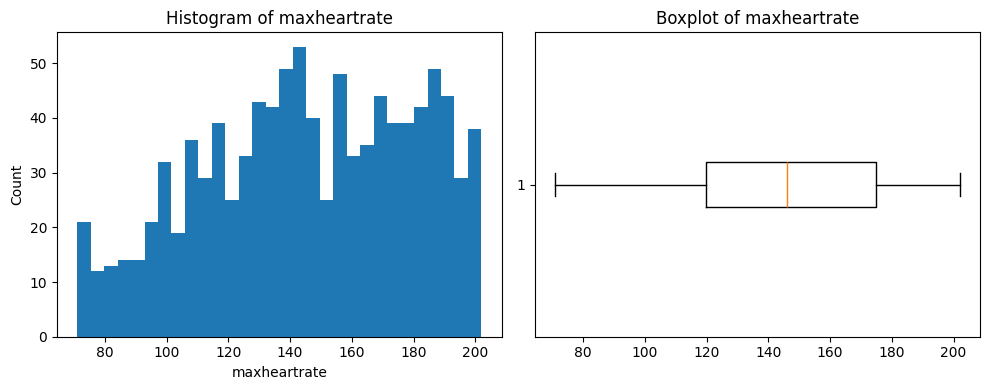

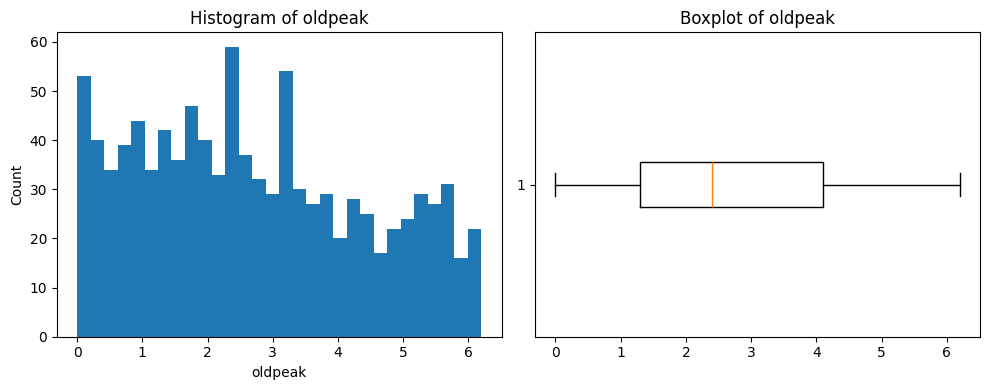

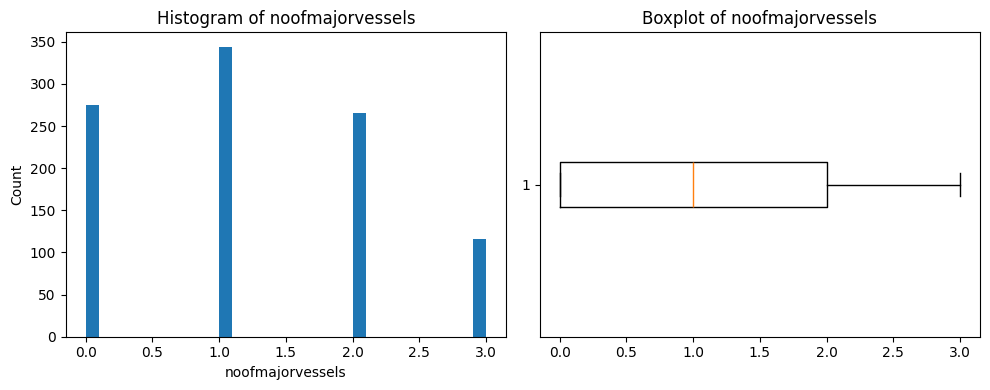

In [53]:
numeric_cols = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate',
                'oldpeak', 'noofmajorvessels']
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    # Histogram
    plt.subplot(1,2,1)
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col); plt.ylabel("Count")
    # Boxplot
    plt.subplot(1,2,2)
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

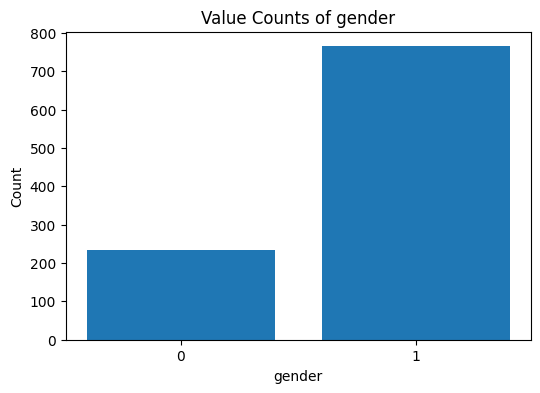

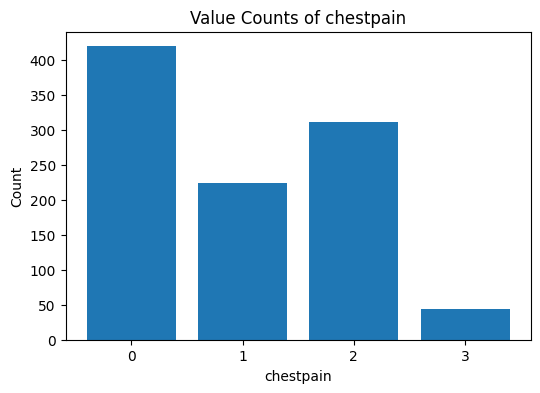

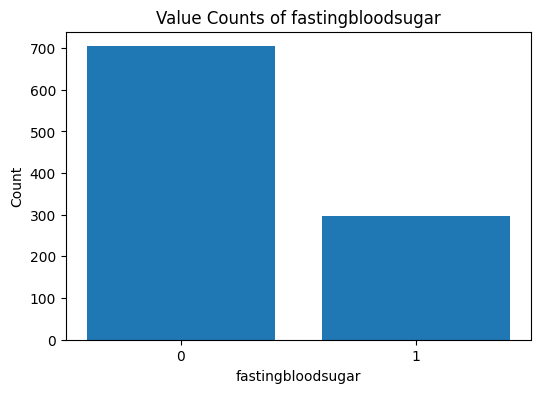

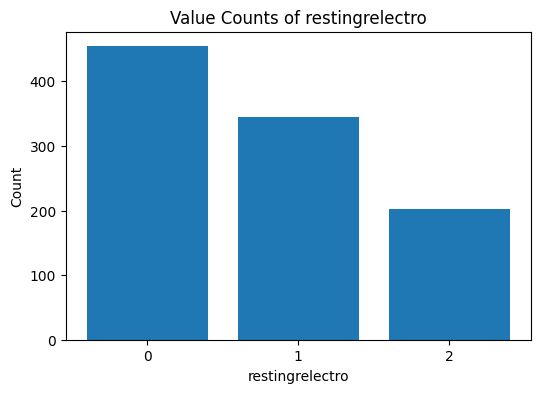

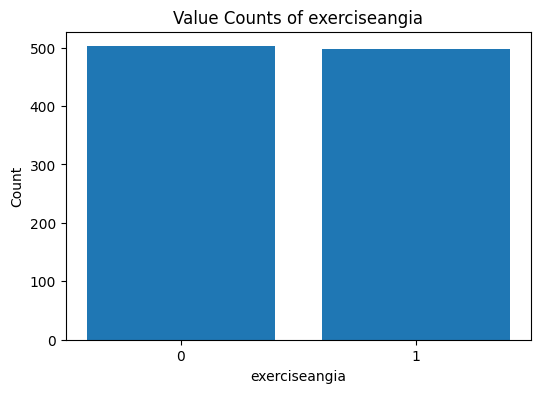

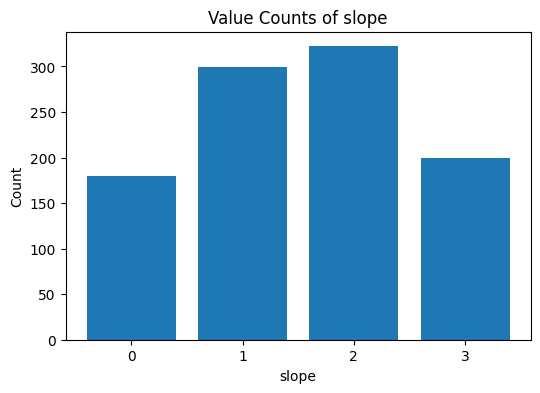

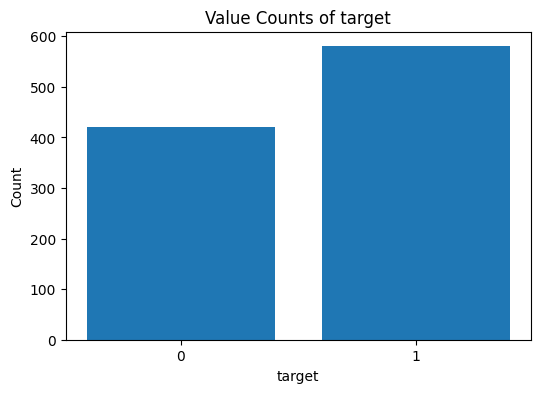

In [54]:
# 3) UNIVARIATE – CATEGORICAL/BINARY
cat_cols = ['gender', 'chestpain', 'fastingbloodsugar',
            'restingrelectro', 'exerciseangia', 'slope', 'target']
for col in cat_cols:
    counts = df[col].value_counts().sort_index()
    plt.figure(figsize=(6,4))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"Value Counts of {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10700\1007882986.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['No Disease','Disease'])


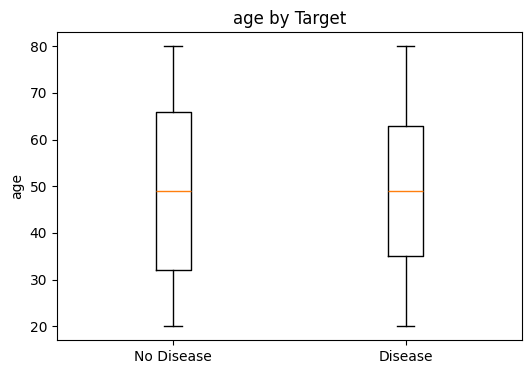

C:\Users\User\AppData\Local\Temp\ipykernel_10700\1007882986.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['No Disease','Disease'])


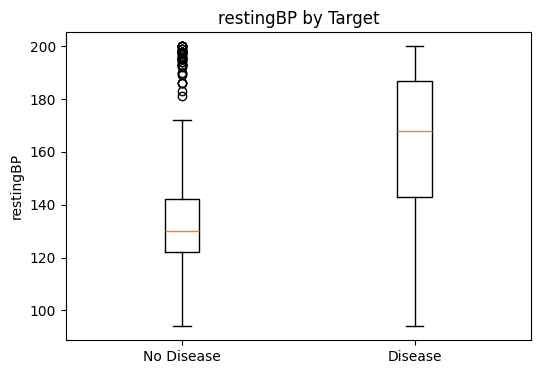

C:\Users\User\AppData\Local\Temp\ipykernel_10700\1007882986.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['No Disease','Disease'])


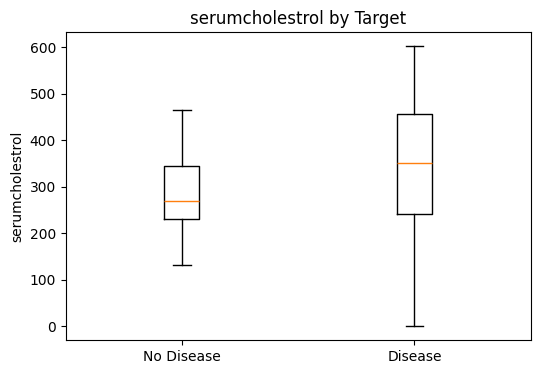

C:\Users\User\AppData\Local\Temp\ipykernel_10700\1007882986.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['No Disease','Disease'])


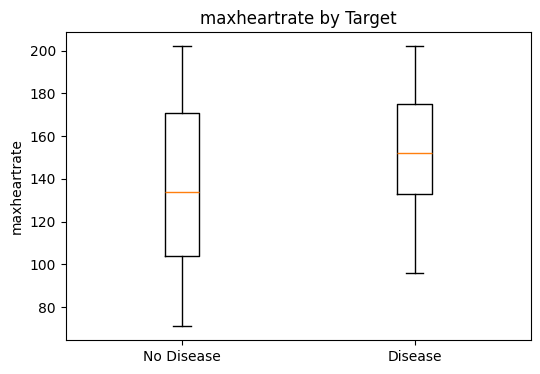

C:\Users\User\AppData\Local\Temp\ipykernel_10700\1007882986.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['No Disease','Disease'])


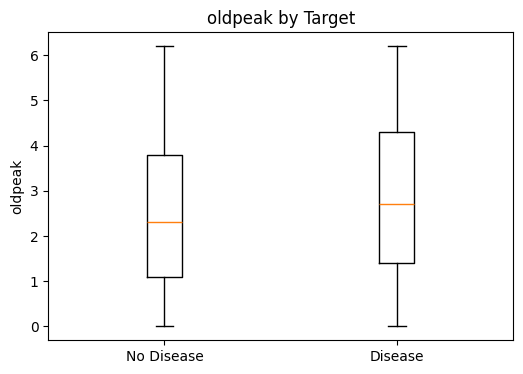

C:\Users\User\AppData\Local\Temp\ipykernel_10700\1007882986.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['No Disease','Disease'])


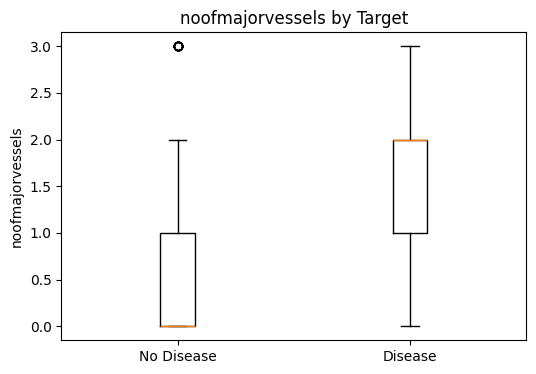

In [55]:
# 4) BIVARIATE – NUMERIC vs TARGET (boxplots)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    data0 = df[df['target']==0][col]
    data1 = df[df['target']==1][col]
    plt.boxplot([data0, data1], labels=['No Disease','Disease'])
    plt.title(f"{col} by Target")
    plt.ylabel(col)
    plt.show()

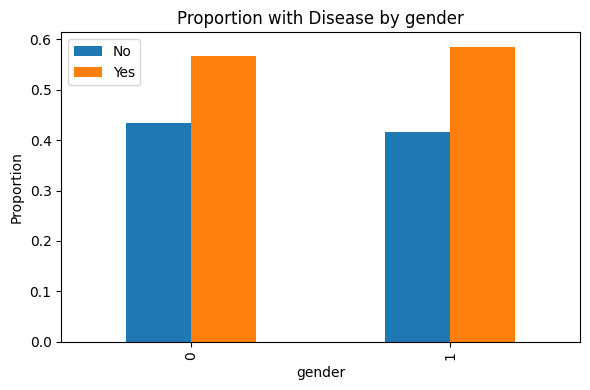

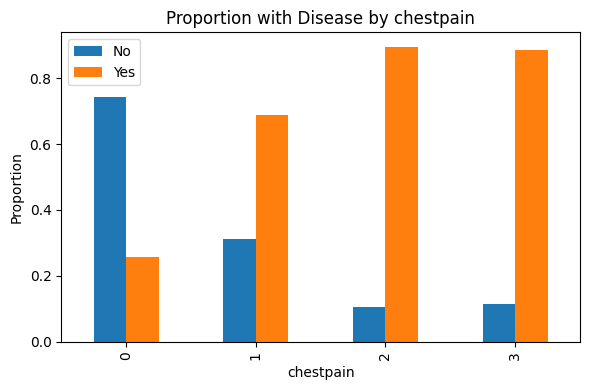

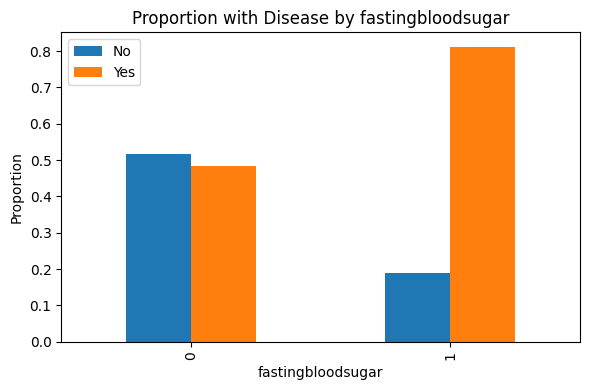

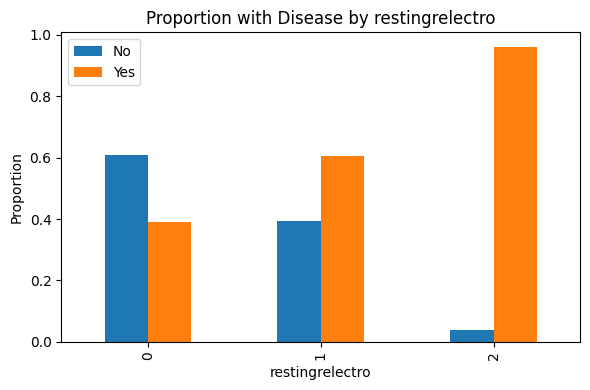

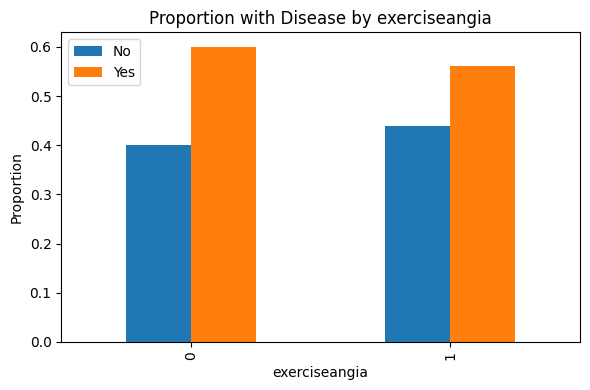

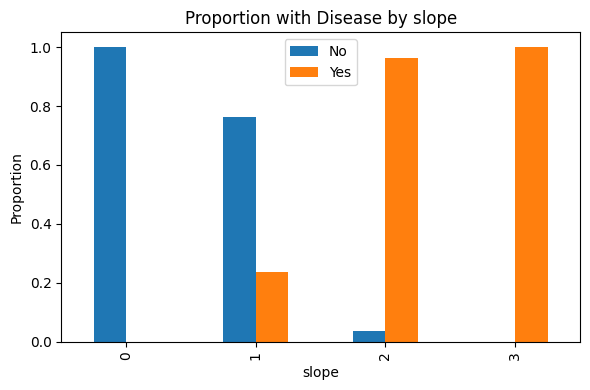

In [56]:
# 5) BIVARIATE – CATEGORICAL vs TARGET (grouped proportions)
for col in cat_cols[:-1]:  # skip 'target'
    ct = pd.crosstab(df[col], df['target'], normalize='index')
    ct.plot(kind='bar', figsize=(6,4))
    plt.title(f"Proportion with Disease by {col}")
    plt.xlabel(col); plt.ylabel("Proportion")
    plt.legend(['No','Yes'])
    plt.tight_layout()
    plt.show()

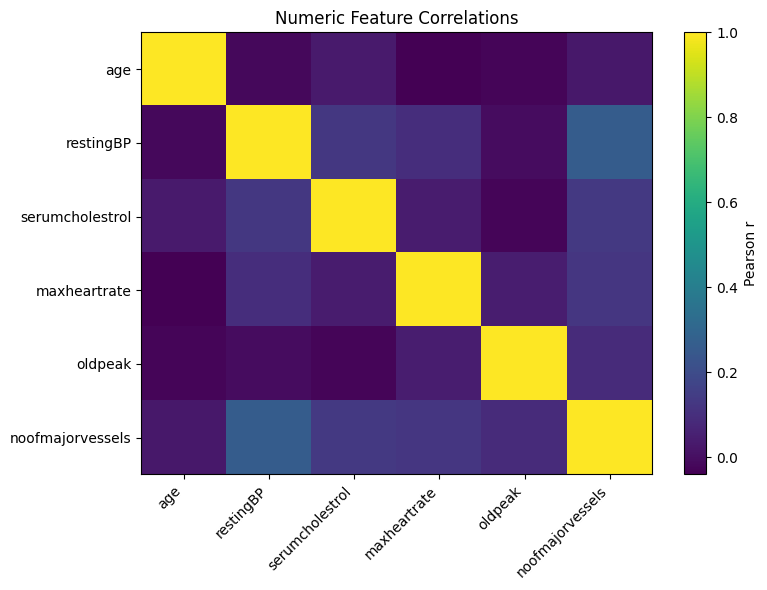

In [57]:
# 6) CORRELATION MATRIX – NUMERIC FEATURES
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='viridis', aspect='auto')
plt.colorbar(label="Pearson r")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Numeric Feature Correlations")
plt.tight_layout()
plt.show()

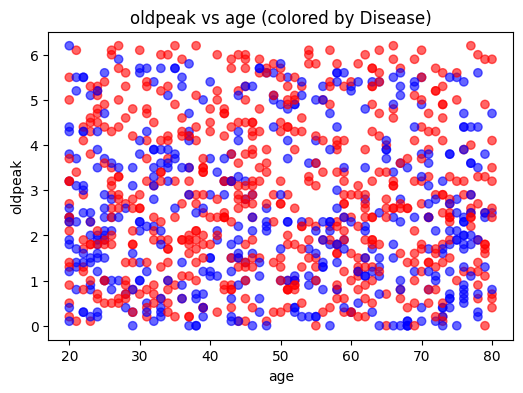

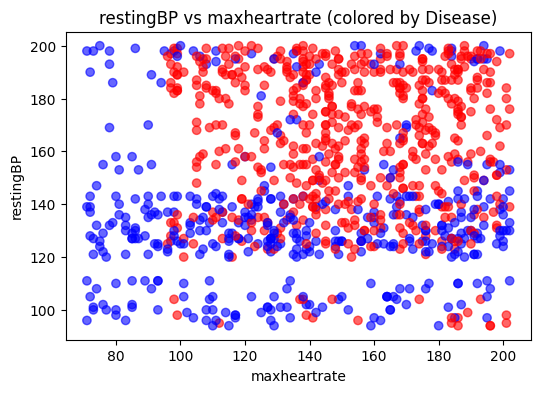

In [58]:
# 7) PAIRWISE SCATTERPLOTS FOR SELECTED PAIRS
pairs = [('age','oldpeak'), ('maxheartrate','restingBP')]
for x, y in pairs:
    plt.figure(figsize=(6,4))
    plt.scatter(df[x], df[y], c=df['target'], cmap='bwr', alpha=0.6)
    plt.xlabel(x); plt.ylabel(y)
    plt.title(f"{y} vs {x} (colored by Disease)")
    plt.show()

In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# 1) Scale numeric columns, keep as DataFrame
numeric_cols = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
sc = StandardScaler()
X_num = pd.DataFrame(
    sc.fit_transform(df[numeric_cols]),
    columns=numeric_cols,
    index=df.index
)

# 2) Add your categorical columns back in
for cat in ['gender', 'chestpain', 'fastingbloodsugar',
            'restingrelectro', 'exerciseangia', 'slope']:
    X_num[cat] = df[cat]

# 3) Final feature matrix and target
X = X_num
y = df['target']

# 4) Train/test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import pandas as pd

# 5) Build, tune, and fit Logistic Regression
base_model = LogisticRegression(random_state=42, max_iter=5000)

param_dist = {
    'C': np.logspace(-4, 4, 20),       # regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],               # saga supports all three penalties
    'l1_ratio': [0.0, 0.5, 1.0]        # only used when penalty='elasticnet'
}

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

best_lr = search.best_estimator_
print("Best Logistic Regression params:", search.best_params_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Logistic Regression params: {'solver': 'saga', 'penalty': 'l1', 'l1_ratio': 0.5, 'C': np.float64(1.623776739188721)}


c:\Users\User\OneDrive\Desktop\Python_Files\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [ ]:
# Evaluate on test set
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:,1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Test ROC AUC: {:.3f}".format(roc_auc_score(y_test, y_proba)))

# Coefficients (feature importance)
coefs = pd.Series(best_lr.coef_[0], index=X.columns)
print("\nTop positive predictors:\n", coefs.sort_values(ascending=False).head())
print("\nTop negative predictors:\n", coefs.sort_values().head())
print("full accuracy score: ", acc)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        84
           1       0.98      1.00      0.99       116

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Test ROC AUC: 0.998

Top positive predictors:
 slope              6.046132
gender             2.571090
restingrelectro    1.080066
chestpain          1.019434
restingBP          0.982530
dtype: float64

Top negative predictors:
 oldpeak           -1.663280
age               -0.065772
exerciseangia      0.000000
serumcholestrol    0.018094
maxheartrate       0.443007
dtype: float64


In [ ]:


# 5) Build, tune, and fit model
base_model = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']
}

search = RandomizedSearchCV(
    base_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train, y_train)

best_model = search.best_estimator_
print("Best hyperparameters:", search.best_params_)




Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 30, 'class_weight': None}


In [64]:
# Evaluate on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Test ROC AUC: {:.3f}".format(roc_auc_score(y_test, y_proba)))

# Feature importances
importances = pd.Series(best_model.feature_importances_, index=X.columns)
print("\nTop 5 Features:\n", importances.sort_values(ascending=False).head())


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       0.99      0.98      0.99       116

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

Test ROC AUC: 0.998

Top 5 Features:
 slope              0.432147
chestpain          0.151803
restingBP          0.146082
serumcholestrol    0.075345
restingrelectro    0.049556
dtype: float64


In [66]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# 5) Build, tune, and fit XGBoost model
base_model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

best_xgb = search.best_estimator_
print("Best hyperparameters for XGBoost:", search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\User\OneDrive\Desktop\Python_Files\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:03:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best hyperparameters for XGBoost: {'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [67]:
# Evaluate on test set
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Test ROC AUC: {:.3f}".format(roc_auc_score(y_test, y_proba)))

# Feature importances
import pandas as pd
import numpy as np
importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
print("\nTop 5 Features:\n", importances.sort_values(ascending=False).head())


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.99      0.99      0.99       116

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Test ROC AUC: 0.999

Top 5 Features:
 slope              0.590488
chestpain          0.162111
restingrelectro    0.066634
restingBP          0.042840
gender             0.034923
dtype: float32
